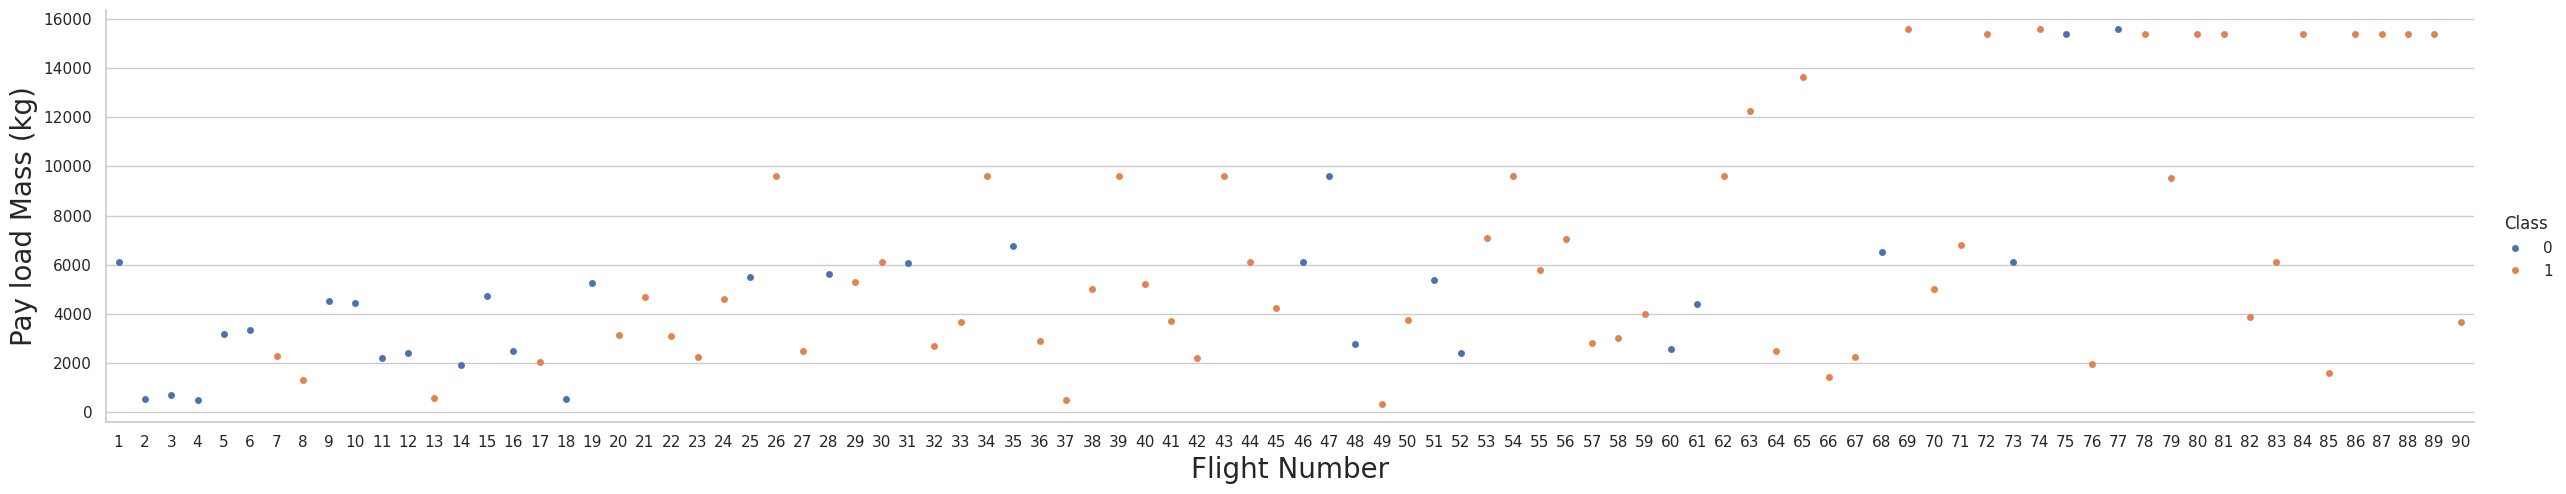

In [3]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])
from js import fetch
import io
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

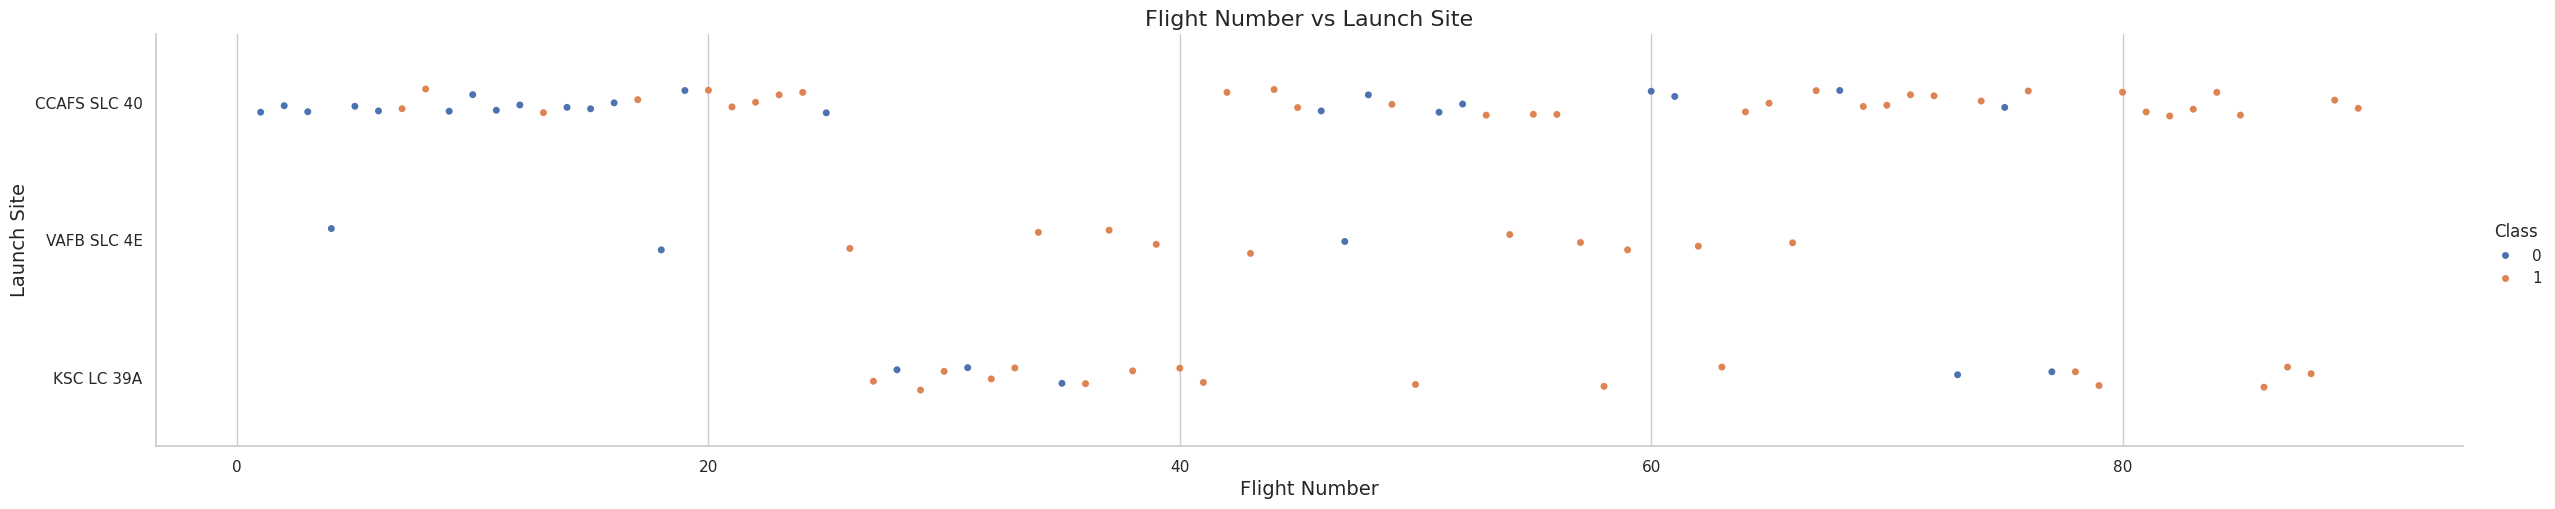

In [4]:
# Scatter plot FlightNumber vs LaunchSite, hue = Class
sns.catplot(
    x="FlightNumber",
    y="LaunchSite",
    hue="Class",
    data=df,
    aspect=5,
    kind="strip",  # scatter points
    jitter=True
)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs Launch Site", fontsize=16)
plt.show()


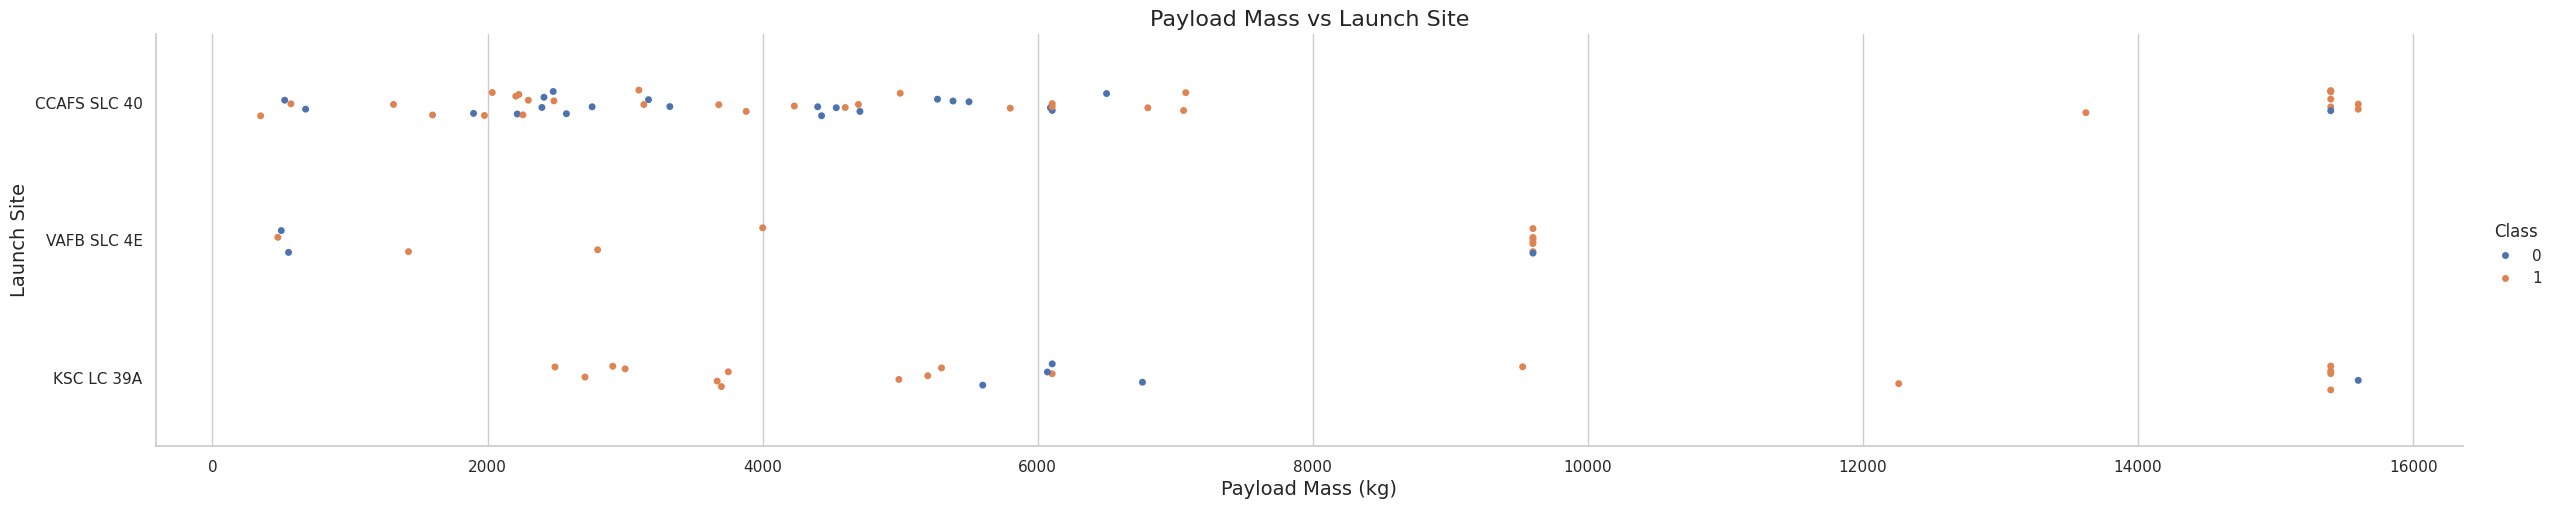

In [5]:
# Scatter plot PayloadMass vs LaunchSite
sns.catplot(
    x="PayloadMass",
    y="LaunchSite",
    hue="Class",
    data=df,
    aspect=5,
    kind="strip",
    jitter=True
)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Payload Mass vs Launch Site", fontsize=16)
plt.show()


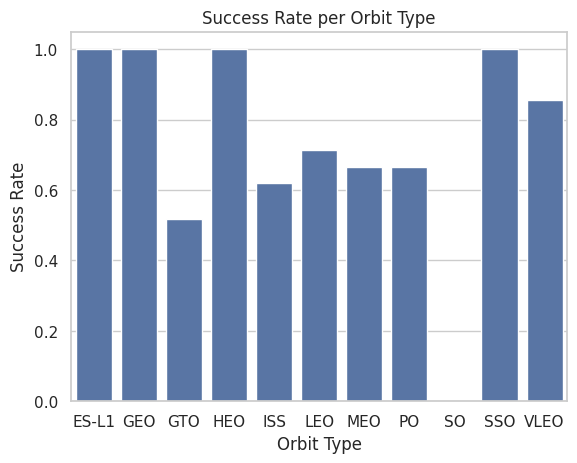

In [6]:
# Tính success rate trung bình theo Orbit
orbit_success = df.groupby("Orbit")["Class"].mean().reset_index()

# Bar chart
sns.barplot(x="Orbit", y="Class", data=orbit_success)
plt.ylabel("Success Rate")
plt.xlabel("Orbit Type")
plt.title("Success Rate per Orbit Type")
plt.show()


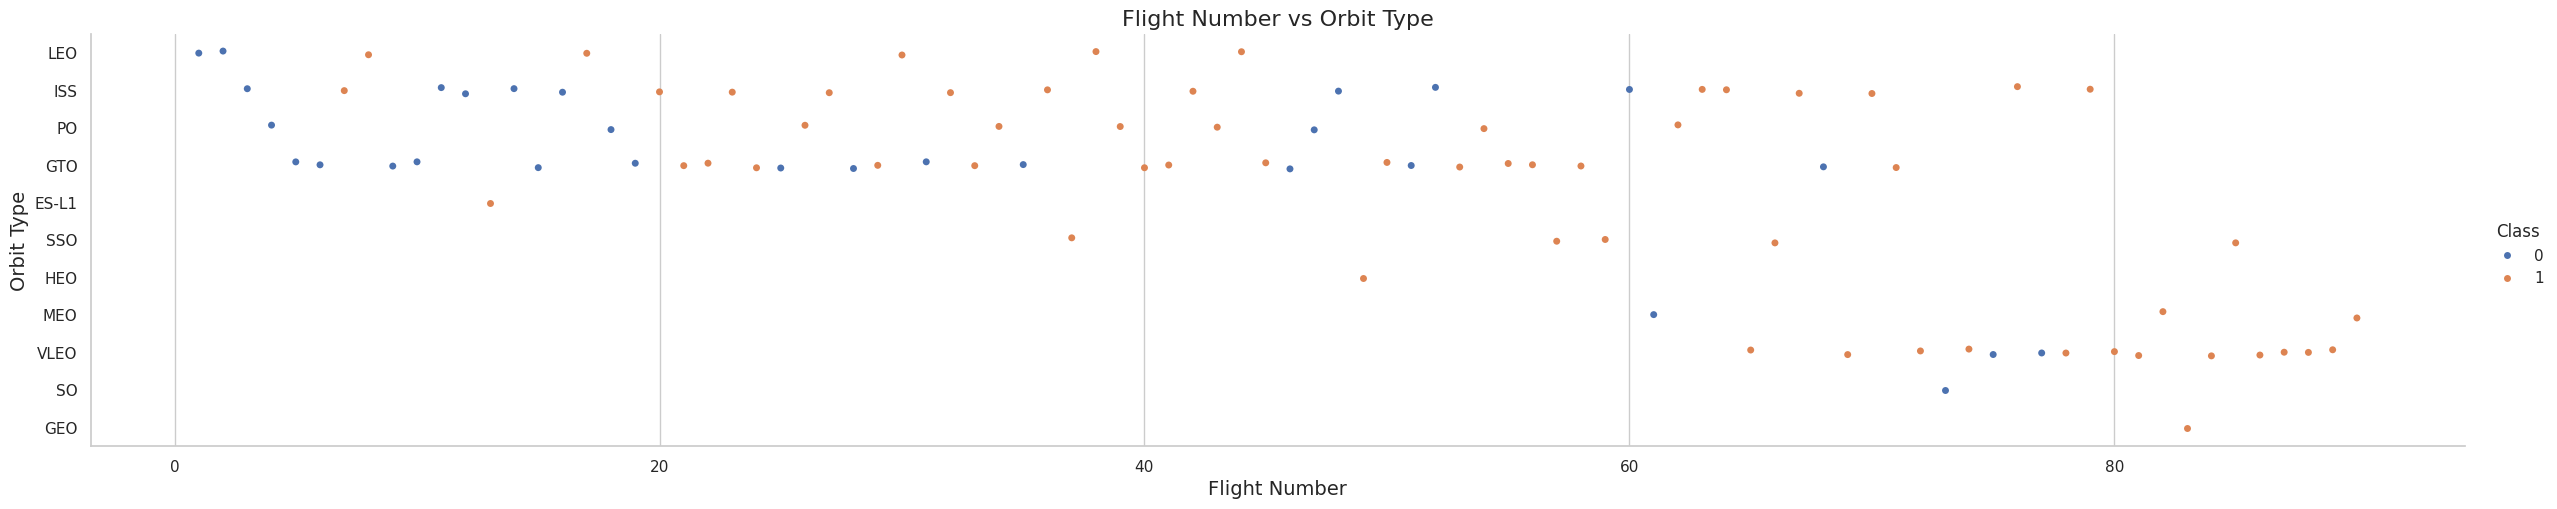

In [7]:
# Scatter plot FlightNumber vs Orbit, hue=Class
sns.catplot(
    x="FlightNumber",
    y="Orbit",
    hue="Class",
    data=df,
    aspect=5,
    kind="strip",
    jitter=True
)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Flight Number vs Orbit Type", fontsize=16)
plt.show()


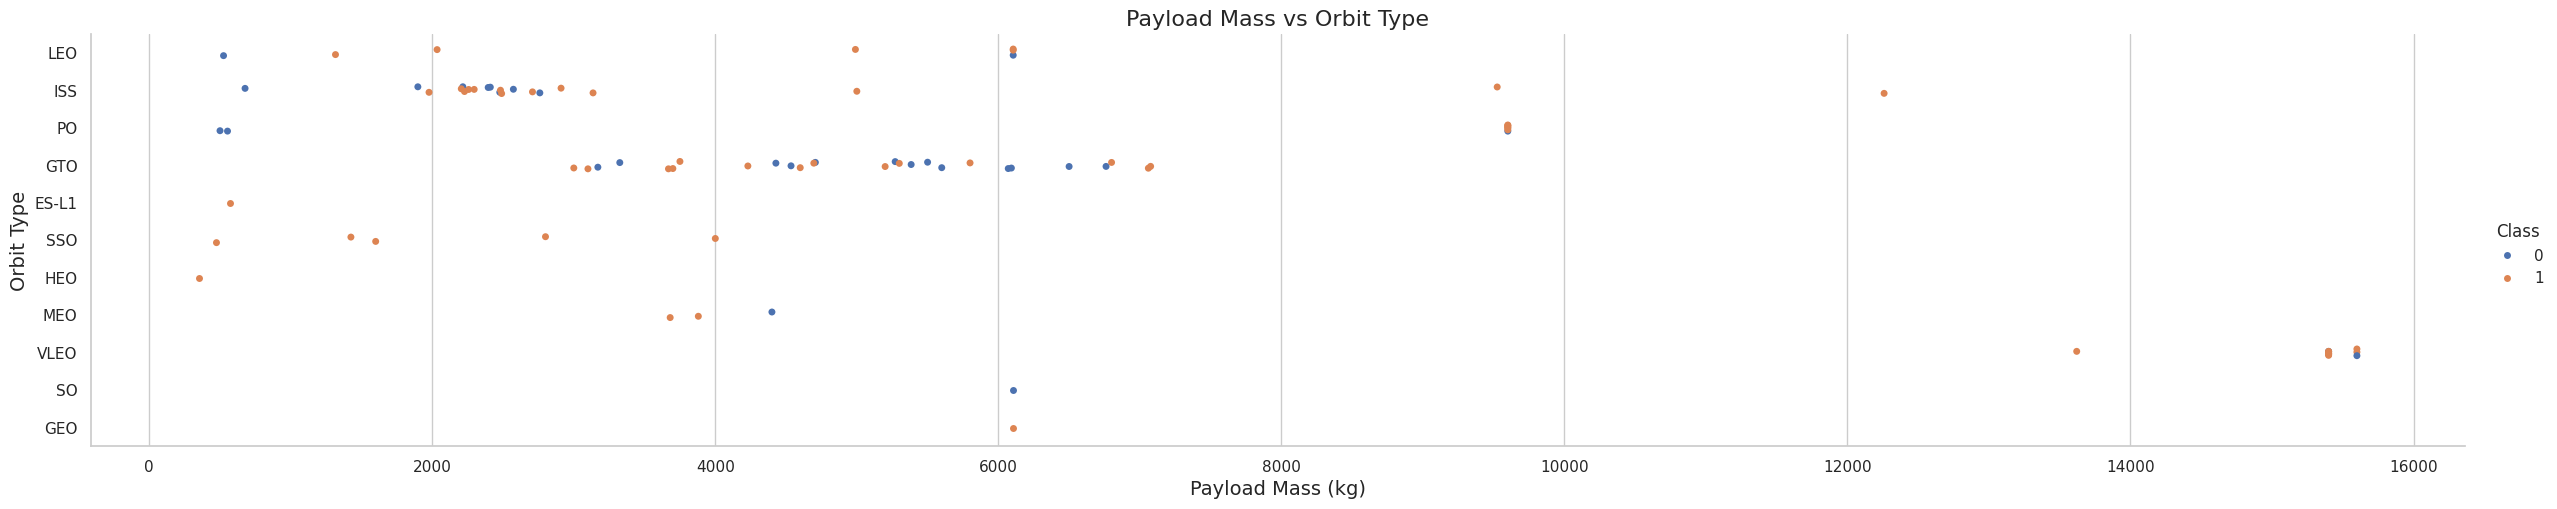

In [8]:
# Scatter plot PayloadMass vs Orbit, hue=Class
sns.catplot(
    x="PayloadMass",
    y="Orbit",
    hue="Class",
    data=df,
    aspect=5,
    kind="strip",
    jitter=True
)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Payload Mass vs Orbit Type", fontsize=16)
plt.show()


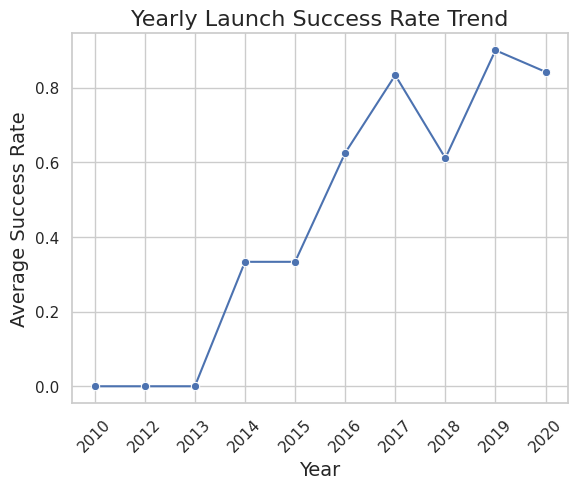

In [9]:
# Extract year from Date
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])

# Compute average success rate per year
success_rate_year = df.groupby('Year')['Class'].mean().reset_index()

# Line chart
sns.lineplot(x='Year', y='Class', data=success_rate_year, marker='o')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Success Rate", fontsize=14)
plt.title("Yearly Launch Success Rate Trend", fontsize=16)
plt.xticks(rotation=45)
plt.show()


In [10]:
# Select features
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 
               'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Apply One-Hot Encoding to categorical columns
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
features_one_hot = pd.get_dummies(features, columns=categorical_cols)

# Display head
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
